In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
totDF = pd.read_csv('../data/raw/totSampDF.csv')

C:\Users\conma\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,9,10,11,13,14,16,18,19,20,21,22,23,27,28,29,30,31,32,42,56,57,64,66,68,75,77,100,101,102,103,104,105,106,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##### Values to do analysis on

 Mom age
 
 Mom’s age to first baby
 
 Multiple Births
 
 Plurality
 
 BMI / Mom’s weight / weight gain M&C
 
 previous children - if prior_living_births, prior_dead_births, prior_terminations
 
 mean of mothers age vs mean of first child birthed

In [9]:
#totDF = totDF.drop(totDF.columns[0],axis=1)#.reset_index()
totDF.head(250000)

,birth_year,birth_month,birth_time,birth_day_of_wk,birth_place,mothers_age_imputed,mothers_age,mothers_nativity,mothers_residence_status,mothers_race,...,pre_preg_lbs_reporting,delivery_lbs_reporting,weight_gain,weight_gain_reporting,pre_preg_diab_reporting,gest_diab_reporting,pre_preg_hypten_reporting,gest_hypten_reporting,hypten_ecl_reporting,prev_preterm_birth_reporting
0,2013.0,5.0,1209,5.0,1,,19.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013.0,4.0,2105,6.0,1,,25.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013.0,5.0,814,5.0,1,,31.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013.0,4.0,2037,4.0,1,,25.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013.0,3.0,1623,5.0,1,,27.0,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2014.0,5.0,807,2.0,1,,35.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249996,2014.0,8.0,1120,1.0,1,,44.0,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249997,2014.0,10.0,2035,4.0,1,,32.0,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249998,2014.0,6.0,1448,7.0,1,,31.0,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
totDF['mothers_age'].value_counts()

In [145]:
totDF['is_first_child'] = ((totDF['prior_living_births']+totDF['prior_dead_births']+totDF['prior_terminations'])) <= 0
firstChildDF = totDF['is_first_child'].copy()

False    749058
True     250942
Name: is_first_child, dtype: int64

In [140]:
plt.figure(figsize=(16,16))
totDF['is_first_child'] = totDF['prior_living_births','prior_dead_births', 'prior_terminations'].sum()
plurYR = totDF.groupby('birth_year')['mothers_age'].value_counts().unstack()
plurYR.plot(logy=True,color=['black','green','blue','red','cyan'],legend=True)
firChil = totDF & firstChildDF
plt.xlabel('Number of cases of Plurality')
plt.ylabel('Years based on amount of Twins')

AttributeError: 'int' object has no attribute 'unstack'

<Figure size 1152x1152 with 0 Axes>

In [88]:
totDF.groupby('plurality')['birth_year'].value_counts()

plurality  birth_year
1.0        2015.0        193111
           2013.0        193060
           2014.0        193055
           2016.0        193050
           2017.0        193025
2.0        2017.0          6774
           2014.0          6736
           2016.0          6724
           2013.0          6691
           2015.0          6677
3.0        2013.0           226
           2016.0           214
           2014.0           200
           2015.0           197
           2017.0           195
4.0        2013.0            18
           2015.0            14
           2016.0            11
           2014.0             7
           2017.0             5
5.0        2013.0             4
           2014.0             2
           2015.0             1
           2016.0             1
           2017.0             1
Name: birth_year, dtype: int64

<Figure size 1152x1152 with 0 Axes>

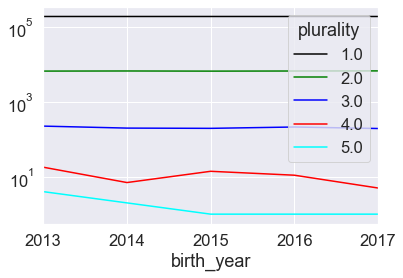

In [135]:
plt.figure(figsize=(16,16))
plurYR = totDF.groupby('birth_year')['plurality'].value_counts().unstack()
plurYR.plot(logy=True,color=['black','green','blue','red','cyan'],legend=True)
plt.xlabel('Number of cases of Plurality')
plt.ylabel('Years based on amount of Twins')

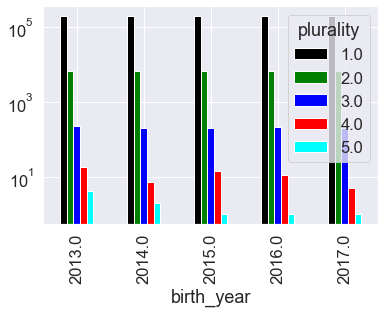

In [133]:
totDF.groupby('birth_year')['plurality'].value_counts().unstack().plot(kind='bar',logy=True,color=['black','green','blue','red','cyan'])